In [1]:
import torch, sys, os
sys.path.append("../../modules/imagenet")
import datapipe as dp
import dit
import generate as gn
import imagenet_maps as im
import viz
import warnings, copy
import save as sv
warnings.filterwarnings("ignore")

root = "../../data/ImageNet"
model_dir = "../../data/ImageNet/DiT-XL-2"
model1_path = "../../../../../Downloads/IE2f/ImageNet-Experiments/dit-os/expr-9/checkpoints/DiT_step_500.pth"
device = "mps"
JSON = "../../data/ImageNet/imagenet_class_index.json"

model, vae = dit.load_DiT(model_dir , device)
model.eval(), vae.eval();

model1 = copy.deepcopy(model)
sv.apply_trainable_checkpoint(model1, model1_path, device)

Time taken by gen_x is 60.4932 seconds


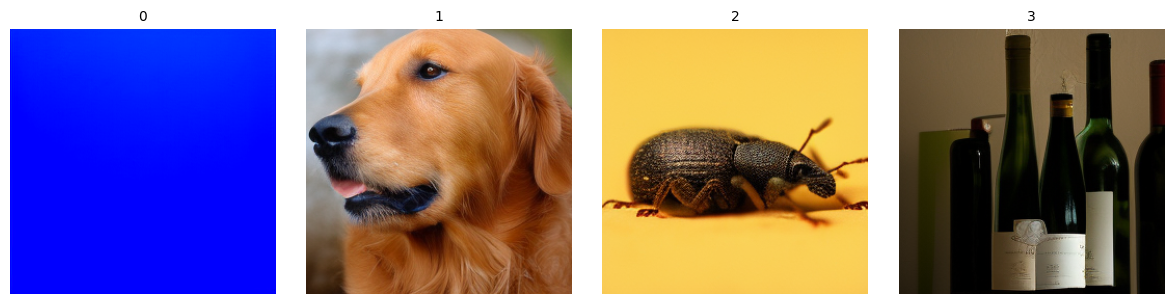

In [13]:
noise = torch.randn(4, 4, 32, 32, device=device)
label = torch.tensor([107, 207, 307, 907], dtype=torch.long, device=device)
imgs = gn.gen_x(model, vae, noise, label, n_steps=25, guidance_scale=4.)
viz.show(imgs)

Time taken by gen_x is 45.0613 seconds


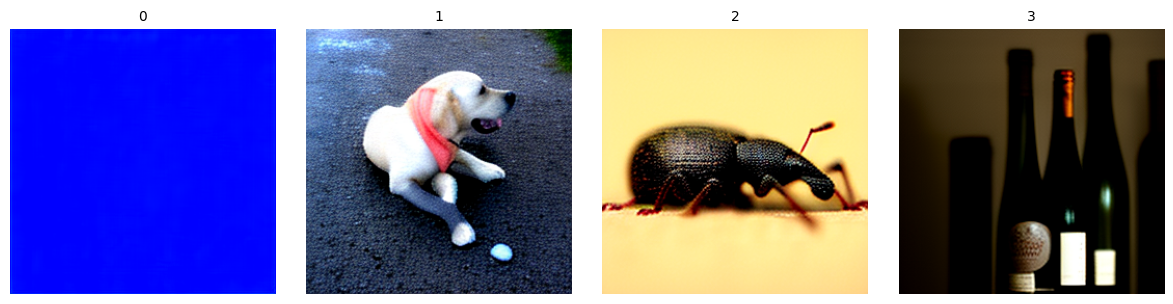

In [14]:
# model1 = copy.deepcopy(model)
# path1 = f'{root}/test-model/DiT_step_400.pth'
# sv.apply_trainable_checkpoint(model1, path1, device)
imgs1 = gn.gen_x(model1, vae, noise, label, n_steps=25, guidance_scale=6.)
viz.show(imgs1)

In [12]:
import classifier as cl
cl.classify(imgs1, device)

[549, 208, 307, 907]

Time taken by gen_x is 63.3968 seconds


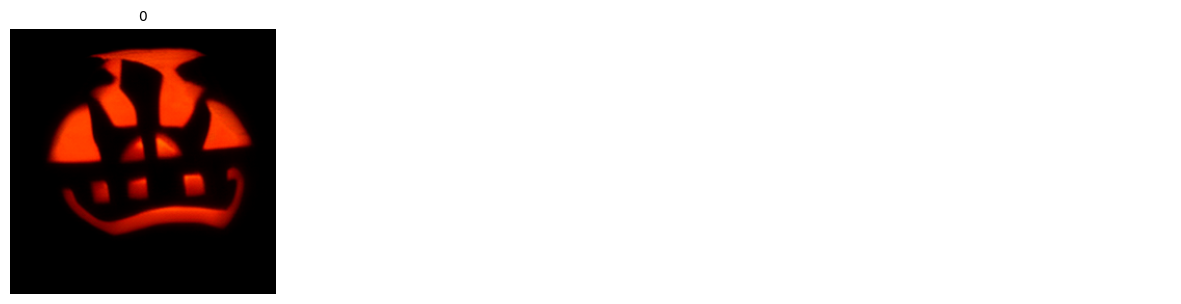

In [29]:
imgs2 = gn.gen_x(model1, vae, noise, 607, n_steps=15, guidance_scale=4.)
viz.show(imgs2)

In [36]:
y = torch.randn(70, 2)
i = [67, 4, 2]
y[i] == torch.stack([y[i[0]], y[i[1]], y[i[2]]], dim=0)

tensor([[True, True],
        [True, True],
        [True, True]])

In [33]:
y[i[0]]

tensor([ 0.4600, -0.0105])

In [42]:
os.listdir()

['DiT_step_500.pth', 'training_log.csv']